In [4]:
#Ex 7. Write a python script for categorization of given set of document files 
#with Latent Semantic Analysis and manually verify the same. 

In [18]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords

In [19]:

wordnet_lemmatizer = WordNetLemmatizer()
all_files=['NLPdataEX7_doc1.txt','NLPdataEX7_doc3.txt','NLPdataEX7_doc4.txt','NLPdataEX7_doc5.txt','NLPdataEX7_doc6.txt','NLPdataEX7_doc7.txt','NLPdataEX7_doc8.txt']

words=[]


In [20]:
for file in all_files:
    words += open(file) 

stopwords =set(stopwords.words("english"))


In [21]:
def my_tokenizer(s):
    
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    
    return tokens

In [22]:
# create a word-to-index map so that we can create our word-frequency vectors later

word_index_map = {}
current_index = 0
all_tokens = []
index_word_map = []
for w in words:
    tokens = my_tokenizer(w)
    all_tokens.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1
            index_word_map.append(token)
   
 

In [23]:
# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns

i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1



In [27]:

def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()



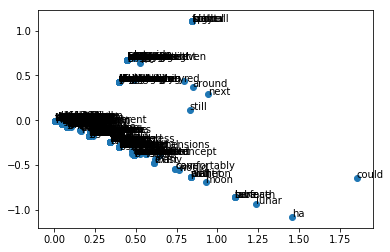

In [28]:
if __name__ == '__main__':
    main()
